In [11]:
import pandas as pd

file_path = '/Users/bashir/Documents/UCL/Foundations of Spatial Data Science/listings.csv'
airbnb_data = pd.read_csv(file_path)

airbnb_data.head()

,Borough,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Islington,51.56861,-0.11270,Private room,79,1,41,0.26,2,360,11
1,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,150,7,94,0.56,1,73,5
2,Wandsworth,51.44201,-0.18739,Private room,42,2,216,1.45,1,217,9
3,Westminster,51.52195,-0.14094,Entire home/apt,476,3,54,0.36,9,300,4
4,Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,175,5,38,0.27,1,40,2


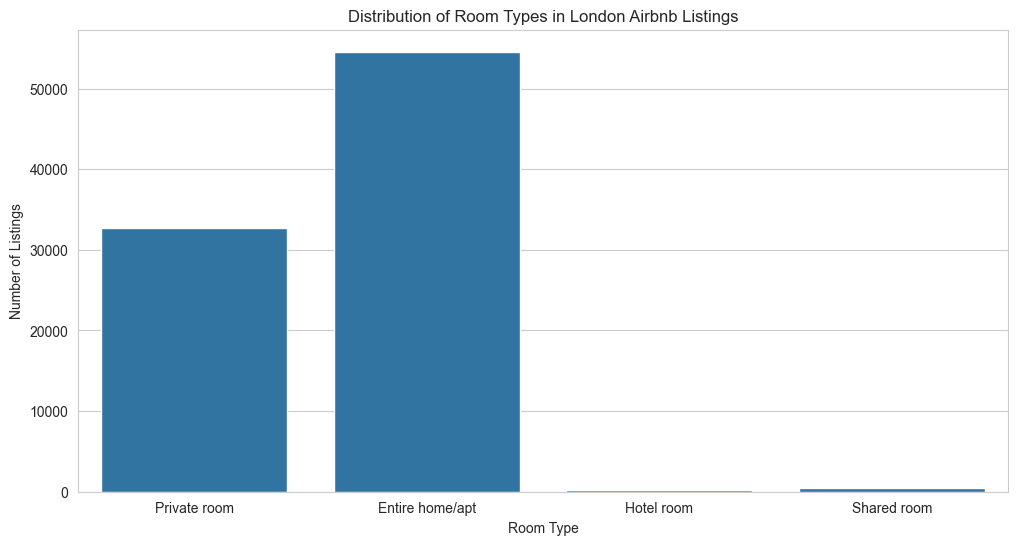

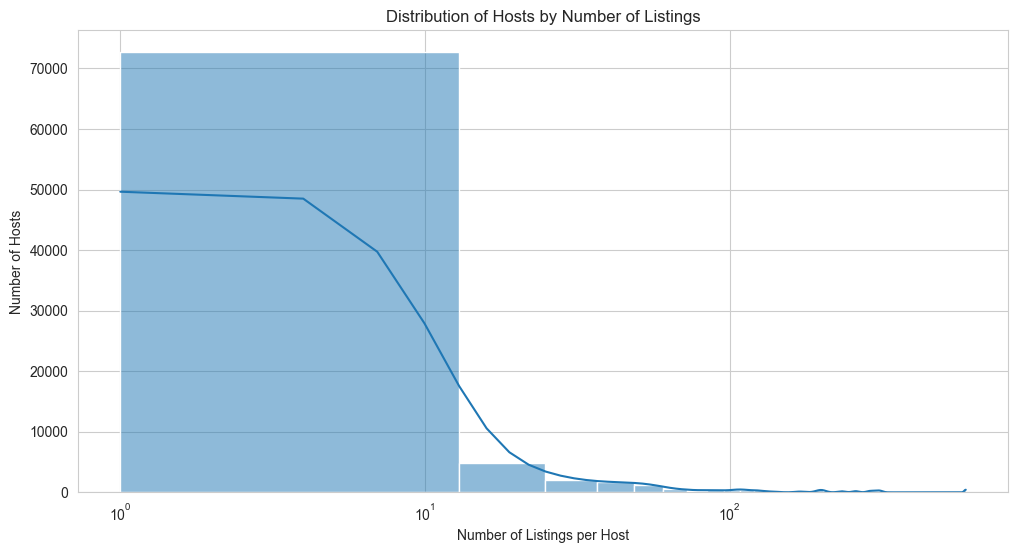

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of Room Types
plt.figure(figsize=(12, 6))
sns.countplot(data=airbnb_data, x='room_type')
plt.title('Distribution of Room Types in London Airbnb Listings')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

# Distribution of Hosts by their number of listings
plt.figure(figsize=(12, 6))
sns.histplot(airbnb_data['calculated_host_listings_count'], bins=50, kde=True)
plt.title('Distribution of Hosts by Number of Listings')
plt.xlabel('Number of Listings per Host')
plt.ylabel('Number of Hosts')
plt.xscale('log') # Using log scale due to wide range of values
plt.show()


/var/folders/t6/2l4skldj33v76fg1nxfgvs7c0000gn/T/ipykernel_48858/2225623503.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


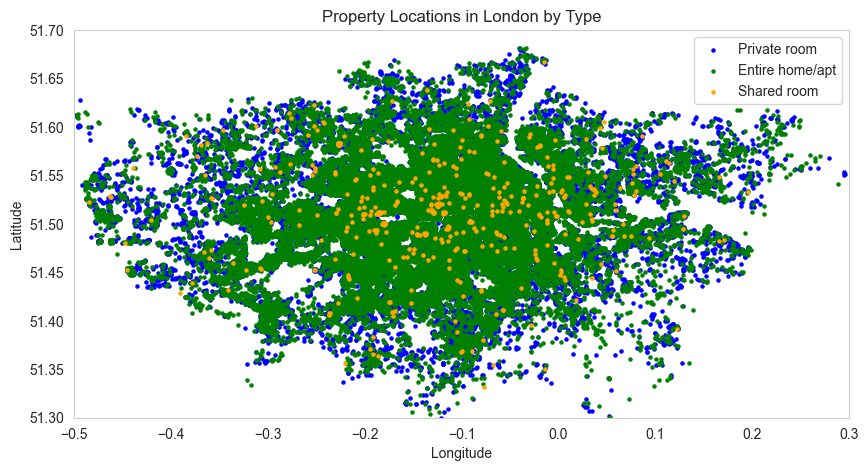

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(airbnb_data, geometry=gpd.points_from_xy(airbnb_data.longitude, airbnb_data.latitude))

# Load a base map of the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Set the boundaries for London (approximate)
london_boundaries = {
    "min_lon": -0.5,
    "min_lat": 51.3,
    "max_lon": 0.3,
    "max_lat": 51.7
}

# Define colors for different property types
colors = {
    'Private room': 'blue',
    'Entire home/apt': 'green',
    'Shared room': 'orange',
    # Add more property types and colors as needed
}

# Plot the base map
fig, ax = plt.subplots(figsize=(10, 10))
world.plot(ax=ax, color='white', edgecolor='black')

# Focus the map on the London area
ax.set_xlim(london_boundaries["min_lon"], london_boundaries["max_lon"])
ax.set_ylim(london_boundaries["min_lat"], london_boundaries["max_lat"])

# Plot each property type in a different color
for property_type, color in colors.items():
    subset = gdf[gdf['room_type'] == property_type]
    subset.plot(ax=ax, marker='o', color=color, markersize=5, label=property_type)

plt.title('Property Locations in London by Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

